In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
from eficient_frontier.ml_logic.RTfuncs import *
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score


#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [95]:
path_X_test_preprocessed= '/Users/Elena/code/Xryrapier/eficient_frontier/X_test_preprocessed.csv'
path_X_train_preprocessed= '/Users/Elena/code/Xryrapier/eficient_frontier/X_train_preprocessed.csv'
path_y_train= '/Users/Elena/code/Xryrapier/eficient_frontier/y_train.csv'
path_y_test= '/Users/Elena/code/Xryrapier/eficient_frontier/y_test.csv'
X_test_preprocessed= pd.read_csv(path_X_test_preprocessed)
X_train_preprocessed=pd.read_csv(path_X_train_preprocessed)
y_train=pd.read_csv(path_y_train)
y_test=pd.read_csv(path_y_test)

In [96]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [97]:
deep_copy(X_test_preprocessed)
deep_copy(X_train_preprocessed)
deep_copy(y_train)
deep_copy(y_test)

shape_X_test = X_test_preprocessed.shape
shape_X_train = X_train_preprocessed.shape
shape_y_train = y_train.shape
shape_y_test = y_test.shape

print("Shape of X_test:", shape_X_test)
print("Shape of X_train:", shape_X_train)
print("Shape of y_train:", shape_y_train)
print("Shape of y_test:", shape_y_test)


Shape of X_test: (3950, 20)
Shape of X_train: (15798, 20)
Shape of y_train: (15798, 1)
Shape of y_test: (3950, 1)


<a id='4'></a>
# 1. Evaluate Algorithms and Models

Let us evaluate the algorithms and the models. 

<a id='4.1'></a>
## 1.1. Train Test Split

Performing a train and test split in this step. 

<a id='4.2'></a>
## 4.2. Test Options and Evaluation Metrics


In [98]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
scoring ='neg_mean_absolute_error'
scoring = 'r2'

<a id='4.3'></a>
## 4.3. Compare Models and Algorithms

### Regression Models

In [99]:
regression_models = create_regression_models()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Elena/.pyenv/versions/3.10.6/envs/eficient_frontier/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ly/lz4gxy415k59t9g35p3cjmnh0000gn/T/ipykernel_10244/3361054758.py", line 1, in <module>
    regression_models = create_regression_models()
  File "/Users/Elena/code/Xryrapier/eficient_frontier/eficient_frontier/ml_logic/RTfuncs.py", line 51, in create_regression_models
NameError: name 'LinearRegression' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Elena/.pyenv/versions/3.10.6/envs/eficient_frontier/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Elena/.pyenv/versions/3.10.6/envs/eficient_frontier/lib/python3.10/site-packages/IPyth

### K-folds cross validation

In [100]:
model_names, model_results, best_model = perform_cross_validation_and_store_results_with_best_model(regression_models, X_train_preprocessed, y_train, num_folds=10, seed=3)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Elena/.pyenv/versions/3.10.6/envs/eficient_frontier/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ly/lz4gxy415k59t9g35p3cjmnh0000gn/T/ipykernel_10244/3084538735.py", line 1, in <module>
    model_names, model_results, best_model = perform_cross_validation_and_store_results_with_best_model(regression_models, X_train_preprocessed, y_train, num_folds=10, seed=3)
  File "/Users/Elena/code/Xryrapier/eficient_frontier/eficient_frontier/ml_logic/RTfuncs.py", line 70, in perform_cross_validation_and_store_results_with_best_model
NameError: name 'KFold' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Elena/.pyenv/versions/3.10.6/envs/eficient_frontier/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    

In [101]:
model_names

['LR', 'LASSO', 'EN', 'KNN', 'CART', 'SVR', 'ABR', 'GBR', 'RFR', 'ETR']

### Algorithm comparison

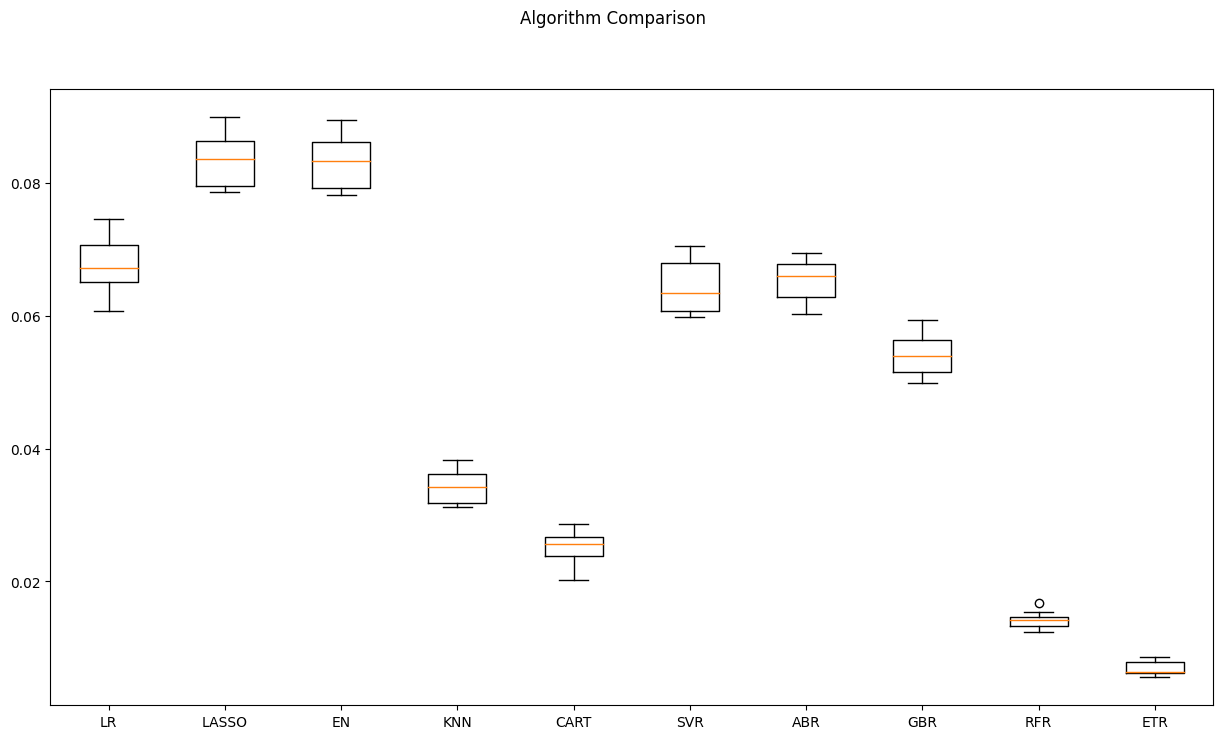

In [102]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(15,8)
plt.show()

The non linear models perform better than the linear models, which means that a non linear relationship between the risk tolerance and the difference variables use to predict it. Given random forest regression is one of the best methods, we use it for further grid search. 

<a id='5'></a>
# 5. Model Tuning and Grid Search

Given that the Random Forest is the best model, Grid Search is performed on Random Forest.

In [103]:
def perform_grid_search(X_train, Y_train, best_model, num_folds=10, seed=None, scoring='neg_mean_squared_error'):
    param_grid = {
        'n_estimators': [450, 500, 550, 600],      # Number of trees in the forest
    }
    model = best_model(random_state=seed)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train, Y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
perform_grid_search(X_train_preprocessed, y_train, ExtraTreesRegressor, num_folds=10, seed=3)

Best: -0.006815 using {'n_estimators': 550}
-0.006829 (0.001075) with: {'n_estimators': 450}
-0.006824 (0.001073) with: {'n_estimators': 500}
-0.006815 (0.001077) with: {'n_estimators': 550}
-0.006821 (0.001074) with: {'n_estimators': 600}


<a id='6'></a>
# 6. Finalise the Model

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [104]:
best_model = ExtraTreesRegressor(n_estimators=550) 

In [105]:
best_model.fit(X_train_preprocessed, y_train)

ExtraTreesRegressor(n_estimators=550)

In [106]:
y_test_pred = best_model.predict(X_test_preprocessed)

In [107]:
r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse}")
print(f"Test R^2: {r2}")

Test RMSE: 0.08043969053991165
Test R^2: 0.92064028113573


From the mean square error and R2 shown above for the test set, the results look good. 

<a id='6.3'></a>
## 6.3. Save Model for Later Use

In [ ]:
model_filename = 'finalized_model.sav'
save_model_to_pickle(model, model_filename)

In [109]:
model_filename = 'finalized_model.sav'
load_and_evaluate_model(model_filename, X_test_preprocessed, y_test)

NameError: name 'X_test' is not defined

__Conclusion__:

We showed that machine learning models might be able to objectively
analyze the behavior of different investors in a changing market and attribute these
changes to variables involved in determining risk appetite. With an increase in the
volume of investor’s data and availability of rich machine learning infrastructure,
such models might prove to be more useful.

We saw that there is a non-linear relationship between the variables and the risk tolerance. Income and net worth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.
